# ***Case Study: Vehicle Advertisements Analysis***

In [27]:
#For Numpy & Pandas

import numpy as np
import pandas as pd
#For Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

#For Warnings

import warnings
warnings.filterwarnings('ignore')

#For Data Preprocessing

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#For Statistical Tests
from sklearn.cluster import KMeans
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#For Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# For Model Selection

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# For Model Evaluation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
#import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

# For Model Saving

import pickle

In [8]:
df = pd.read_csv("vehicles.csv") # File is now in the current working directory
df.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23-02-2024 23.35,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,Sep-19,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23-02-2024 8.32,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,Jun-18,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01-12-2024 20.27,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,Jun-18,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04-12-2024 14.47,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,Feb-17,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08-12-2024 9.28,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,Feb-17,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [9]:
print("- The dataframe has", df.shape[0], "rows and", df.shape[1], "columns.\n")

- The dataframe has 258888 rows and 26 columns.



In [10]:
print("- The dataframe contains", df.size, "total elements. \n")

- The dataframe contains 6731088 total elements. 



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [12]:
print("The dataframe has the following data types:\n\n",df.dtypes,"\n")

The dataframe has the following data types:

 ad_title                object
ad_description          object
details                 object
slug                    object
title                   object
type                    object
price                   object
timestamp               object
posted_date             object
deactivation_date       object
category                object
parent_category         object
location                object
geo_region              object
area                    object
is_delivery_free          bool
is_doorstep_delivery      bool
is_dsd_applicable         bool
is_member               object
is_authorized_dealer    object
is_featured_member      object
is_verified               bool
membership_level        object
member_since            object
properties              object
user                    object
dtype: object 



In [13]:
df.describe()
# Summary numerical data - Statistics.

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
count,258888,258881,155505,258888,258888,258888,255077,258882,258882,258882,...,258888,258888,249838,249838,249838,258888,258888,108634,258888,258888
unique,203314,192899,18053,258879,118237,2,5495,113463,252696,255120,...,1,1,2,2,2,2,3,90,135732,80719
top,Bicycle in Gampaha City | ikman,Good condition,"50,000 km",bajaj-re-2003-for-sale-kandy-62,Bicycle,for_sale,"Rs 25,000",08-12-2024 13.04,2023-03-08T10:25:58+05:30,2023-01-27T04:34:43.000Z,...,False,False,False,False,False,False,free,Dec-16,{'Service type': 'Transport Services'},95a2c7432ab661901fd052b7830d959187641c1079efe3...
freq,89,1860,3115,2,3275,257731,2688,65,7,3,...,258888,258888,151134,249794,249824,190841,159394,9404,8560,2135


In [14]:
df.isnull().sum()
## Getting count of column-wise null values in df.

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [15]:
df.duplicated().sum()
## Getting count of duplicated values in df.

0



## Observation:

- ## df has 258888 records & 26 columns. Columns includes vehicles advertisements and their related details.
- ## Datatype are object and bool.
- ## There is some null values but no duplicated values.


# Section 1: Price Prediction
## Problem Statement: Develop a predictive model to estimate the price of a vehicle based on the provided features.



## - **1. Data Cleaning and Pre - Processing.**

In [16]:
dfc = df.copy()
# Copying df in dfc to keep df intact.

In [17]:
# dropping 'details' column as more than half of the rows contains null values.
dfc = dfc.drop(columns=['details'], axis=1)

In [18]:
# Filling null values of member_since column
dfc['member_since'].fillna(dfc['member_since'].mode()[0], inplace=True)

In [19]:
#Filling the Categorical Values with Most frequent Values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
dfc['is_member'] = imputer.fit_transform(dfc[['is_member']]).squeeze()
dfc['is_authorized_dealer'] = imputer.fit_transform(dfc[['is_authorized_dealer']]).squeeze()
dfc['is_featured_member'] = imputer.fit_transform(dfc[['is_featured_member']]).squeeze()

In [20]:
# Clean the 'price' column to remove non-numeric characters
dfc['price'] = dfc['price'].str.replace('Rs ', '').str.replace(',', '')

# Replace 'Negotiable' and any other non-numeric strings with NaN
dfc['price'] = pd.to_numeric(dfc['price'], errors='coerce')

# Now you can fill null values with the mean
dfc['price'].fillna(dfc['price'].mean(), inplace=True)

In [21]:
# filling null values of sd_description column
dfc['ad_description'].fillna(df['ad_description'].mode()[0], inplace=True)

In [16]:
# Verifying if above mentioned columns have been filled and mentiond columns have been dropped or not
print(dfc.info(), "\n")
print(dfc.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ad_title              258888 non-null  object 
 1   ad_description        258888 non-null  object 
 2   slug                  258888 non-null  object 
 3   title                 258888 non-null  object 
 4   type                  258888 non-null  object 
 5   price                 258888 non-null  float64
 6   timestamp             258882 non-null  object 
 7   posted_date           258882 non-null  object 
 8   deactivation_date     258882 non-null  object 
 9   category              258888 non-null  object 
 10  parent_category       258888 non-null  object 
 11  location              258888 non-null  object 
 12  geo_region            258888 non-null  object 
 13  area                  258888 non-null  object 
 14  is_delivery_free      258888 non-null  bool   
 15  

In [22]:
dfc.head()

,ad_title,ad_description,slug,title,type,price,timestamp,posted_date,deactivation_date,category,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,18000.0,23-02-2024 23.35,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,...,False,False,True,False,False,True,premium,Sep-19,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,67000.0,23-02-2024 8.32,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,...,False,False,True,False,False,True,plus,Jun-18,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,85000.0,01-12-2024 20.27,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,...,False,False,True,False,False,True,plus,Jun-18,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,47000.0,04-12-2024 14.47,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,...,False,False,True,False,False,False,plus,Feb-17,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,9000.0,08-12-2024 9.28,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,...,False,False,True,False,False,False,plus,Feb-17,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


### **Uptill here all null values have been filled in 'dfc'. Hence making a copy of  'dfc' in 'dfc1'  so  'dfc' remains intact.**


In [23]:
dfc1 = dfc.copy()

### **Converting columns from object data-type to required data-type.**


In [19]:
# Convert date-related column to numeric values
dfc1['timestamp'] = pd.to_datetime(dfc1['timestamp'], format='%d %b %I:%M %p')

In [20]:
# Convert date-related columns to pandas datetime objects
dfc1['timestamp'] = pd.to_datetime(dfc1['timestamp'], errors='coerce')
dfc1['posted_date'] = pd.to_datetime(dfc1['posted_date'], errors='coerce')
dfc1['deactivation_date'] = pd.to_datetime(dfc1['deactivation_date'], errors='coerce')

# Convert pandas datetime objects to Unix timestamps (in seconds)
dfc1['timestamp'] = dfc1['timestamp'].astype(np.int64) // 10**9
dfc1['posted_date'] = dfc1['posted_date'].astype(np.int64) // 10**9
dfc1['deactivation_date'] = dfc1['deactivation_date'].astype(np.int64) // 10**9

 ### **Checking for missing values after conversion**

In [21]:
print(dfc1['posted_date'].isnull().sum())
print(dfc1['timestamp'].isnull().sum())
print(dfc1['deactivation_date'].isnull().sum())

0
0
0


## Checking for converted data-type of columns.

In [22]:
dfc1.head()

,ad_title,ad_description,slug,title,type,price,timestamp,posted_date,deactivation_date,category,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,18000.0,-2204324700,1677175510,1653930784,Auto Parts & Accessories,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,67000.0,-2204378880,1677121364,1648744079,Auto Parts & Accessories,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,85000.0,-2180057580,1669906669,1648735437,Auto Parts & Accessories,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,47000.0,-2179818780,1670145447,1659100979,Auto Parts & Accessories,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,9000.0,-2179492320,1670471884,1659099344,Auto Parts & Accessories,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [23]:
dfc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ad_title              258888 non-null  object 
 1   ad_description        258888 non-null  object 
 2   slug                  258888 non-null  object 
 3   title                 258888 non-null  object 
 4   type                  258888 non-null  object 
 5   price                 258888 non-null  float64
 6   timestamp             258888 non-null  int64  
 7   posted_date           258888 non-null  int64  
 8   deactivation_date     258888 non-null  int64  
 9   category              258888 non-null  object 
 10  parent_category       258888 non-null  object 
 11  location              258888 non-null  object 
 12  geo_region            258888 non-null  object 
 13  area                  258888 non-null  object 
 14  is_delivery_free      258888 non-null  bool   
 15  

In [24]:
# Dropping Irrelevant Columns

d1 = dfc1.drop(columns=['slug','type','member_since'], axis=1)

In [25]:
#Checking it is dropped properly or not

d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ad_title              258888 non-null  object 
 1   ad_description        258888 non-null  object 
 2   title                 258888 non-null  object 
 3   price                 258888 non-null  float64
 4   timestamp             258888 non-null  int64  
 5   posted_date           258888 non-null  int64  
 6   deactivation_date     258888 non-null  int64  
 7   category              258888 non-null  object 
 8   parent_category       258888 non-null  object 
 9   location              258888 non-null  object 
 10  geo_region            258888 non-null  object 
 11  area                  258888 non-null  object 
 12  is_delivery_free      258888 non-null  bool   
 13  is_doorstep_delivery  258888 non-null  bool   
 14  is_dsd_applicable     258888 non-null  bool   
 15  

In [26]:
from sklearn.preprocessing import LabelEncoder
# library to transform Categorical data-type to Numerical data-type.

label = LabelEncoder()

d1['ad_title'] = label.fit_transform(d1['ad_title'])
d1['ad_description'] = label.fit_transform(d1['ad_description'])
d1['title'] = label.fit_transform(d1['title'])
d1['category'] = label.fit_transform(d1['category'])
d1['parent_category'] = label.fit_transform(d1['parent_category'])
d1['location'] = label.fit_transform(d1['location'])
d1['is_delivery_free'] = label.fit_transform(d1['is_delivery_free'])
d1['is_doorstep_delivery'] = label.fit_transform(d1['is_doorstep_delivery'])
d1['is_dsd_applicable'] = label.fit_transform(d1['is_dsd_applicable'])
d1['is_member'] = label.fit_transform(d1['is_member'])
d1['is_authorized_dealer'] = label.fit_transform(d1['is_authorized_dealer'])
d1['is_featured_member'] = label.fit_transform(d1['is_featured_member'])
d1['is_verified'] = label.fit_transform(d1['is_verified'])
d1['membership_level'] = label.fit_transform(d1['membership_level'])
d1['geo_region'] = label.fit_transform(d1['geo_region'])
d1['area'] = label.fit_transform(d1['area'])

In [27]:
d1['properties'] = label.fit_transform(d1['properties'])
d1['user'] = label.fit_transform(d1['user'])

In [28]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ad_title              258888 non-null  int32  
 1   ad_description        258888 non-null  int32  
 2   title                 258888 non-null  int32  
 3   price                 258888 non-null  float64
 4   timestamp             258888 non-null  int64  
 5   posted_date           258888 non-null  int64  
 6   deactivation_date     258888 non-null  int64  
 7   category              258888 non-null  int32  
 8   parent_category       258888 non-null  int32  
 9   location              258888 non-null  int32  
 10  geo_region            258888 non-null  int32  
 11  area                  258888 non-null  int32  
 12  is_delivery_free      258888 non-null  int64  
 13  is_doorstep_delivery  258888 non-null  int64  
 14  is_dsd_applicable     258888 non-null  int64  
 15  

In [29]:
# creating a new dataframe to store all columns of numerical data-type from d1.
numerical_df = d1.select_dtypes(include=['number']).copy()
numerical_df

,ad_title,ad_description,title,price,timestamp,posted_date,deactivation_date,category,parent_category,location,...,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,121156,2807,67714,18000.0,-2204324700,1677175510,1653930784,0,0,127,...,0,0,0,1,0,0,1,2,134998,52584
1,11730,73298,9903,67000.0,-2204378880,1677121364,1648744079,0,0,120,...,0,0,0,1,0,0,1,1,135082,29650
2,11712,73275,9886,85000.0,-2180057580,1669906669,1648735437,0,0,120,...,0,0,0,1,0,0,1,1,135090,29650
3,189649,63973,109461,47000.0,-2179818780,1670145447,1659100979,0,0,119,...,0,0,0,1,0,0,0,1,134519,31396
4,189621,63965,109434,9000.0,-2179492320,1670471884,1659099344,0,0,119,...,0,0,0,1,0,0,0,1,134519,31396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,117098,132259,65124,1030000.0,-2201170740,1680329510,1685513476,5,0,93,...,0,0,0,0,0,0,0,0,96888,22939
258884,161609,54791,90806,3550000.0,-2201349000,1680151204,1685335017,5,0,21,...,0,0,0,0,0,0,0,0,117369,63649
258885,104545,129451,56573,70000.0,-2201170740,1680329473,1685513448,9,0,40,...,0,0,0,0,0,0,0,0,135724,63028
258886,181590,125676,103889,7250000.0,-2201170800,1680329457,1685513457,5,0,28,...,0,0,0,1,0,0,0,2,130448,39269


In [30]:
# Creating Co-relation matrix of numerical_df
numerical_df.corr()

,ad_title,ad_description,title,price,timestamp,posted_date,deactivation_date,category,parent_category,location,...,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
ad_title,1.000000,0.060108,0.997849,0.070526,-0.003186,0.001812,-0.005314,-0.093928,NaN,0.007552,...,NaN,NaN,NaN,0.090406,0.016426,0.003403,0.105578,0.084786,0.377490,0.002041
ad_description,0.060108,1.000000,0.060598,-0.038254,0.002822,0.002376,0.003472,0.113885,NaN,-0.027114,...,NaN,NaN,NaN,0.041933,0.008805,-0.000417,-0.013983,0.052471,-0.104145,0.013047
title,0.997849,0.060598,1.000000,0.069374,-0.003173,0.001837,-0.005238,-0.094029,NaN,0.008107,...,NaN,NaN,NaN,0.092343,0.016518,0.003481,0.106249,0.086312,0.371173,0.002815
price,0.070526,-0.038254,0.069374,1.000000,0.009203,-0.000892,0.003197,0.069662,NaN,-0.047871,...,NaN,NaN,NaN,0.043148,0.016096,0.019327,0.059191,0.047749,0.026644,0.004116
timestamp,-0.003186,0.002822,-0.003173,0.009203,1.000000,0.916732,0.916944,0.019853,NaN,0.002971,...,NaN,NaN,NaN,-0.021907,0.000437,0.000071,-0.015592,-0.016618,-0.017127,-0.006455
posted_date,0.001812,0.002376,0.001837,-0.000892,0.916732,1.000000,0.996477,-0.010405,NaN,0.000568,...,NaN,NaN,NaN,0.007962,-0.000277,0.000039,0.007142,0.006501,0.009137,0.001303
deactivation_date,-0.005314,0.003472,-0.005238,0.003197,0.916944,0.996477,1.000000,0.010791,NaN,-0.000733,...,NaN,NaN,NaN,-0.013716,-0.000067,-0.000093,-0.015220,-0.014669,-0.007586,0.000183
category,-0.093928,0.113885,-0.094029,0.069662,0.019853,-0.010405,0.010791,1.000000,NaN,-0.066670,...,NaN,NaN,NaN,-0.343912,0.001170,-0.000085,-0.286994,-0.291568,-0.664119,-0.014995
parent_category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,0.007552,-0.027114,0.008107,-0.047871,0.002971,0.000568,-0.000733,-0.066670,NaN,1.000000,...,NaN,NaN,NaN,0.042014,-0.014918,0.005496,0.052950,0.035641,0.049093,-0.018569


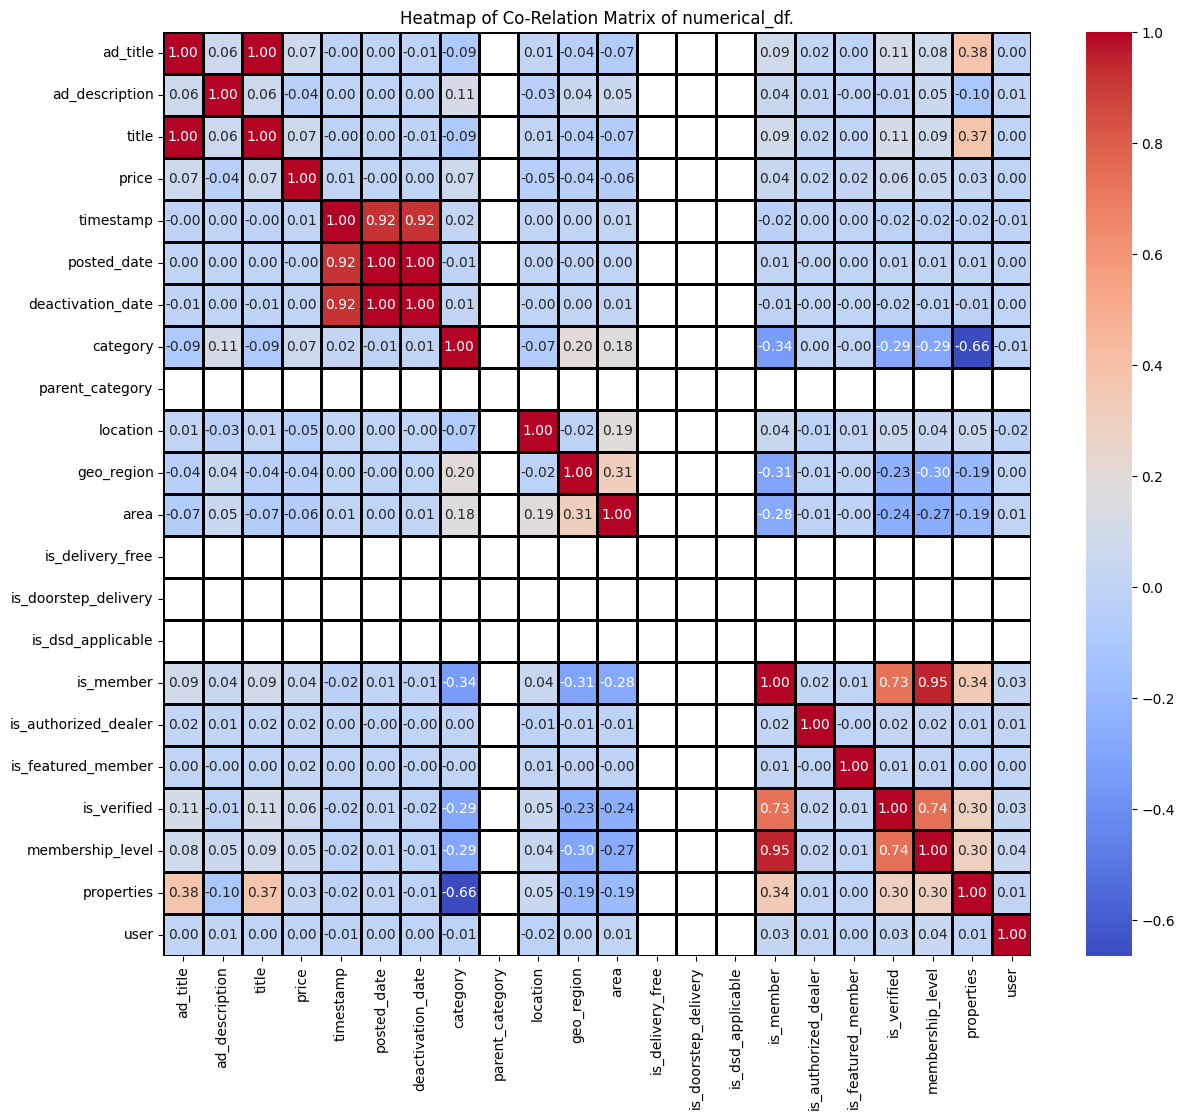

In [31]:
# Create a heatmap of the correlations between the numerical columns
plt.figure(figsize=(14, 12))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm",linewidths=0.73, linecolor="black")
plt.title('Heatmap of Co-Relation Matrix of numerical_df.')
plt.show()

In [32]:
d1.head()

,ad_title,ad_description,title,price,timestamp,posted_date,deactivation_date,category,parent_category,location,...,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,user
0,121156,2807,67714,18000.0,-2204324700,1677175510,1653930784,0,0,127,...,0,0,0,1,0,0,1,2,134998,52584
1,11730,73298,9903,67000.0,-2204378880,1677121364,1648744079,0,0,120,...,0,0,0,1,0,0,1,1,135082,29650
2,11712,73275,9886,85000.0,-2180057580,1669906669,1648735437,0,0,120,...,0,0,0,1,0,0,1,1,135090,29650
3,189649,63973,109461,47000.0,-2179818780,1670145447,1659100979,0,0,119,...,0,0,0,1,0,0,0,1,134519,31396
4,189621,63965,109434,9000.0,-2179492320,1670471884,1659099344,0,0,119,...,0,0,0,1,0,0,0,1,134519,31396


In [33]:
# Split Data into Features (X) and Target Variable (y)

X = d1.drop('price', axis=1)
y = d1['price']

In [34]:
# Split Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **2. Feature Selection.**


- ## **Corelation Analysis to Identify Relevant Features (RF)**


In [35]:
# Calculating the correlation matrix via numerical_df.
corr_matrix = numerical_df.corr()
# Selecting the columns that have a high correlation with the target variable
RF = corr_matrix['price'].sort_values(ascending=False)[1:]

In [36]:
print(RF.index.tolist())

['ad_title', 'category', 'title', 'is_verified', 'membership_level', 'is_member', 'properties', 'is_featured_member', 'is_authorized_dealer', 'timestamp', 'user', 'deactivation_date', 'posted_date', 'ad_description', 'geo_region', 'location', 'area', 'parent_category', 'is_delivery_free', 'is_doorstep_delivery', 'is_dsd_applicable']


## **Applying Feature Selection Model: Recursive Feature Elimination (RFE).**

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

In [38]:
print("Summary of the RFE Model Applied for Feature Selection: \n")

print("- Number of features selected:", rfe.n_features_ , "\n")
print("- Selected features:", list(X_train.columns[rfe.support_]) , "\n")
print("- Feature ranking:", dict(zip(X_train.columns, rfe.ranking_)))

Summary of the RFE Model Applied for Feature Selection: 

- Number of features selected: 10 

- Selected features: ['title', 'category', 'location', 'geo_region', 'area', 'is_member', 'is_authorized_dealer', 'is_featured_member', 'is_verified', 'membership_level'] 

- Feature ranking: {'ad_title': 2, 'ad_description': 4, 'title': 1, 'timestamp': 8, 'posted_date': 6, 'deactivation_date': 7, 'category': 1, 'parent_category': 9, 'location': 1, 'geo_region': 1, 'area': 1, 'is_delivery_free': 10, 'is_doorstep_delivery': 12, 'is_dsd_applicable': 11, 'is_member': 1, 'is_authorized_dealer': 1, 'is_featured_member': 1, 'is_verified': 1, 'membership_level': 1, 'properties': 3, 'user': 5}


## **3. Model Training**

## Applying First Model: Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train_rfe, y_train)

LinearRegression()

In [40]:
y_pred_rfe = linear_reg.predict(X_test_rfe)
y_pred_rfe

array([1817546.18091485,  913831.72728088, 1718243.91497771, ...,
        539031.32758932, 1821666.42111101, 2246084.76501381])

In [41]:
linear_reg.coef_

array([ 1.44252004e+01,  2.07338249e+05, -5.30270859e+03, -4.37179324e+04,
       -4.93765713e+04,  2.17911102e+05,  7.32735667e+06,  1.88065917e+07,
        9.87717639e+05, -7.41031470e+03])

In [42]:
linear_reg.intercept_

1022481.2027151126

## Applying Second Model: Random Forest Regression Model

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train_rfe, y_train)

RandomForestRegressor(random_state=0)

In [44]:
y_pred_ro = rfr.predict(X_test_rfe)
print(y_pred_ro)

[   12670.18214286   262238.33333333  1402500.         ...
  1177450.         12170000.           705663.33125555]


## Applying Third Model:  K-Nearest Neighbour (KNN) Regression Model

In [45]:
from sklearn.neighbors import KNeighborsRegressor

# Defining and training the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_rfe, y_train)

KNeighborsRegressor()

In [46]:
# Predict the prices using the KNN model
y_pred_knn = knn_model.predict(X_test_rfe)

# Print the predicted prices
print(y_pred_knn)

[   9920.  302000. 1169000. ... 2440000. 9606700.  482300.]


## **Evaluate the Models using Cross-Validation.**


In [47]:
from sklearn.model_selection import cross_val_score

# Evaluating the Linear Regression Model using Cross-Validation
linear_regression_scores = cross_val_score(linear_reg, X_train_rfe, y_train, cv=10)
print("Linear Regression Model \n")
print("Linear Regression Cross-Validation Scores: \n", linear_regression_scores)
print("\n Linear Regression Average Cross-Validation Score: ", linear_regression_scores.mean())
print("--------------------------------------------------------------------------------------")
# Evaluating the RandomForestRegressor Model using Cross-Validation
random_forest_scores = cross_val_score(rfr, X_train_rfe, y_train, cv=10)
print("Random Forest Regreesion Model \n")
print("Random Forest Regressor Cross-Validation Scores: \n", random_forest_scores)
print("\n Random Forest Regressor Average Cross-Validation Score: ", random_forest_scores.mean())
print("--------------------------------------------------------------------------------------")
# Evaluating the KNN Model using Cross-Validation
knn_scores = cross_val_score(knn_model, X_train_rfe, y_train, cv=10)
print("KNN Model \n")
print("KNN Cross-Validation Scores: \n", knn_scores)
print("\n KNN Average Cross-Validation Score: ", knn_scores.mean())

Linear Regression Model 

Linear Regression Cross-Validation Scores: 
 [0.03304314 0.0171099  0.0338287  0.0394396  0.0392862  0.03694606
 0.03784414 0.00645128 0.03671349 0.03874394]

 Linear Regression Average Cross-Validation Score:  0.03194064440908585
--------------------------------------------------------------------------------------
Random Forest Regreesion Model 

Random Forest Regressor Cross-Validation Scores: 
 [0.05612929 0.45339904 0.82909009 0.83826125 0.8802358  0.44547724
 0.11399291 0.13159488 0.84774745 0.17286604]

 Random Forest Regressor Average Cross-Validation Score:  0.47687939913177696
--------------------------------------------------------------------------------------
KNN Model 

KNN Cross-Validation Scores: 
 [0.47669355 0.41008156 0.70866743 0.78180878 0.72603079 0.70875132
 0.50506883 0.1169878  0.53753461 0.51644019]

 KNN Average Cross-Validation Score:  0.5488064861187011


## 4. Model Evaluation.

### **Compairing Models based on RMSE, r2 and MSE.**


In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the RMSE for each model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_ro))
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# Calculate the MSE for each model
mse_lr = mean_squared_error(y_test, y_pred_rfe)
mse_rf = mean_squared_error(y_test, y_pred_ro)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate the R2 score for each model
r2_lr = r2_score(y_test, y_pred_rfe)
r2_rf = r2_score(y_test, y_pred_ro)
r2_knn = r2_score(y_test, y_pred_knn)

# Print the results
print("Linear Regression: \n")
print("RMSE:", rmse_lr)
print("MSE:", mse_lr)
print("R2 Score:", r2_lr)

print("Random Forest Regression: \n")
print("RMSE:", rmse_rf)
print("MSE:", mse_rf)
print("R2 Score:", r2_rf)

print("KNN Regression: \n")
print("RMSE:", rmse_knn)
print("MSE:", mse_knn)
print("R2 Score:", r2_knn)


Linear Regression: 

RMSE: 6778458.8979172865
MSE: 45947505030754.03
R2 Score: 0.02245007727770354
Random Forest Regression: 

RMSE: 4900190.845285215
MSE: 24011870320217.03
R2 Score: 0.4891387038265752
KNN Regression: 

RMSE: 5065754.988174274
MSE: 25661873600212.535
R2 Score: 0.45403428242716426


## Selecting the Best-Performing Model.

 Based on the evaluation metrics, the Random Forest model seems to perform the best:
 - It has the lowest RMSE and MAE values, indicating that its predictions are closer to the actual values.
 - It also has the highest R² value, indicating that it explains the most variance in the target variable.

Therefore, the Best-Performing Model is:
- best_model = rfr (Random Forest Regression)

## Deliverables:

## 1. Data Preprocessing and Feature Selection:*

#- Data cleaning and preprocessing involved handling missing values, dropping irrelevant columns, converting data types, and encoding categorical data.
#- Feature selection was performed using correlation analysis and Recursive Feature Elimination (RFE) to identify the most relevant features for price prediction.

## 2. Performance Metrics of Trained Models:

# - Linear Regression:
    #- RMSE: 6778458.8979172865
    #- MSE: 45947505030754.03
    #- R²: 0.02245007727770354
# - Random Forest:
    #- RMSE: 4900190.845285215
    #- MSE: 24011870320217.03
    #- R²: 0.4891387038265752
# - KNN:
    #- RMSE: 5065275.273516488
    #- MSE: 25657013596497.535
    #- R²: 0.4541376807782358



# Problem Statement: Segment users based on their advertisement behaviors and characteristics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("vehicles.csv") 
df.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23-02-2024 23.35,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,Sep-19,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23-02-2024 8.32,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,Jun-18,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01-12-2024 20.27,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,Jun-18,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04-12-2024 14.47,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,Feb-17,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08-12-2024 9.28,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,Feb-17,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


# **Data Preprocessing:**
1. Handle missing values.
2. Encode categorical variables.

In [3]:
pd.pandas.set_option("display.max_columns",None)
pd.pandas.set_option("display.max_rows",None)

In [4]:
df2=df.copy()

In [5]:
df2.head(1)

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23-02-2024 23.35,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,Sep-19,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...


In [6]:
df2=df2.drop(columns=['title','ad_title','ad_description','slug','details','parent_category','is_delivery_free','is_doorstep_delivery','is_dsd_applicable','is_featured_member','is_authorized_dealer','user'],axis=1)

In [7]:
df2.head()

,type,price,timestamp,posted_date,deactivation_date,category,location,geo_region,area,is_member,is_verified,membership_level,member_since,properties
0,for_sale,"Rs 18,000",23-02-2024 23.35,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",True,True,premium,Sep-19,"{'Condition': 'Reconditioned', 'Part or Access..."
1,for_sale,"Rs 67,000",23-02-2024 8.32,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",True,True,plus,Jun-18,"{'Condition': 'Reconditioned', 'Part or Access..."
2,for_sale,"Rs 85,000",01-12-2024 20.27,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",True,True,plus,Jun-18,"{'Condition': 'Reconditioned', 'Part or Access..."
3,for_sale,"Rs 47,000",04-12-2024 14.47,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",True,False,plus,Feb-17,"{'Condition': 'New', 'Part or Accessory Type':..."
4,for_sale,"Rs 9,000",08-12-2024 9.28,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",True,False,plus,Feb-17,"{'Condition': 'New', 'Part or Accessory Type':..."


In [8]:
df2.shape

(258888, 14)

In [9]:
# Remove 'Rs' and commas from 'price', then convert to float
import numpy as np
df2['price'] = df2['price'].astype(str)
df2['price'] = df2['price'].str.replace('Rs', '', regex=False).str.replace(',', '', regex=False)

In [10]:
df2['price'] = df2['price'].apply(lambda x: np.nan if x == 'Negotiable' else float(x))


# find out ad's period

In [11]:

# Convert columns to datetime format
df2['posted_date'] = pd.to_datetime(df2['posted_date'])
df2['deactivation_date'] = pd.to_datetime(df2['deactivation_date'])

# Calculate date difference -- ignore time
df2['date_diff'] = (df2['deactivation_date'] - df2['posted_date']).dt.days


In [12]:
list = [i for i in df2['date_diff'] if i < 0]

In [13]:
len(list)

16970

In [14]:
index_names = df2[df2['date_diff'] < 0].index
df2.drop(index_names, inplace=True)

In [15]:
df2.shape

(241918, 15)

# extract members year

In [16]:
# Assuming df2 is your DataFrame
df2['member_since'] = df2['member_since'].str.extract(r'(\d{4})', expand=False)

#  Convert member since into int

In [17]:
df2['member_since'].isnull().sum()

241918

In [18]:
# as the column 'member_since' contain 149895 null values ==> dropping the column will be aa good decision

In [19]:
df2=df2.drop(columns=['member_since'],axis=1)


#  drop null value

In [20]:
# Handle missing values
df2 = df2.dropna(subset=['type', 'price', 'timestamp', 'posted_date', 'deactivation_date',
       'category', 'location', 'geo_region', 'area', 'is_member',
       'is_verified', 'membership_level', 'properties',
       'date_diff'])

In [21]:
df2.shape

(228475, 14)

In [22]:
df2.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of type                 0
price                0
timestamp            0
posted_date          0
deactivation_date    0
category             0
location             0
geo_region           0
area                 0
is_member            0
is_verified          0
membership_level     0
properties           0
date_diff            0
dtype: int64>

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228475 entries, 7590 to 258887
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype                                
---  ------             --------------   -----                                
 0   type               228475 non-null  object                               
 1   price              228475 non-null  float64                              
 2   timestamp          228475 non-null  object                               
 3   posted_date        228475 non-null  datetime64[ns, pytz.FixedOffset(330)]
 4   deactivation_date  228475 non-null  datetime64[ns, UTC]                  
 5   category           228475 non-null  object                               
 6   location           228475 non-null  object                               
 7   geo_region         228475 non-null  object                               
 8   area               228475 non-null  object                               
 9   is_member   

# Brand from properties

In [24]:
import ast
dict_df=df2["properties"].apply(pd.Series)

In [25]:
df2['properties'].head()

7590    {'Brand': 'Nissan', 'Model': 'Patrol', 'Trim /...
7606    {'Brand': 'Toyota', 'Model': 'Camry', 'Trim / ...
7623    {'Brand': 'Toyota', 'Model': 'Aqua', 'Trim / E...
7638    {'Brand': 'Mercedes Benz', 'Model': 'E350', 'T...
7639    {'Brand': 'Mitsubishi', 'Model': 'L200', 'Trim...
Name: properties, dtype: object

In [32]:
dict_converted = ast.literal_eval(dict_df.iloc[2][0])
print(dict_converted)

{'Brand': 'Toyota', 'Model': 'Aqua', 'Trim / Edition': 'Toyota', 'Year of Manufacture': '2012', 'Condition': 'Used', 'Transmission': 'Automatic', 'Body type': 'Hatchback', 'Fuel type': 'Hybrid', 'Engine capacity': '1,500 cc', 'Mileage': '177,000 km'}


In [33]:
Brand=[]
for i in range(dict_df.shape[0]):
    dict_converted = ast.literal_eval(dict_df.iloc[i][0])

    if 'Brand' not in dict_converted:
        Brand.append('NaN')
    else:
        Brand.append(dict_converted['Brand'])

In [34]:
df2['Brand'] = Brand

In [35]:
df2.shape

(228475, 15)

In [36]:
#  Replace NaN VALUE with actual numpy nana value
df2['Brand'].replace('NaN', np.nan, inplace=True)

In [37]:
df2['Brand'].isnull().sum()

50296

In [38]:
# Remove rows with NaN values in the 'Brand' column
df2 = df2.dropna(subset=['Brand'])

In [39]:
df2.shape

(178179, 15)

In [40]:
#  Removes rows
brand_counts = df2['Brand'].value_counts()
df2 = df2[df2['Brand'].isin(brand_counts[brand_counts >= 1000].index)]

In [41]:
df2['Brand'].value_counts()

Bajaj            36240
Toyota           21277
Honda            20967
Suzuki           12500
Yamaha            8542
TVS               8352
Nissan            7822
Hero              6921
Other             5166
Mitsubishi        5075
Other brand       4915
Tata              3658
Mahindra          2612
Isuzu             2329
Lumala            1815
BMW               1543
Demak             1529
Mazda             1527
Mercedes Benz     1471
Daihatsu          1305
Micro             1267
Tomahawk          1178
Kia               1139
Hyundai           1128
Name: Brand, dtype: int64

# Encode categorical variables

In [42]:
label_encoder = LabelEncoder()
df2['category'] = label_encoder.fit_transform(df2['category'])
df2['is_member'] = label_encoder.fit_transform(df2['is_member'])
df2['location'] = label_encoder.fit_transform(df2['location'])
df2['geo_region'] = label_encoder.fit_transform(df2['geo_region'])
df2['area'] = label_encoder.fit_transform(df2['area'])
df2['Brand'] = label_encoder.fit_transform(df2['Brand'])
df2['is_verified'] = label_encoder.fit_transform(df2['is_verified'])
df2['membership_level'] = label_encoder.fit_transform(df2['membership_level'])

# FEATURE SELECTION
1. PCA
2. Perform PCA with full number of components
3. Determine the number of principal components to retain

PCA
Perform PCA with full number of components
Determine the number of principal components to retain

In [43]:
# Feature Selection
# Use PCA to reduce dimensionality
num_col = df2.select_dtypes(include=['int32', 'float64']).columns
X = df2[num_col]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Perform PCA with full number of components
pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

Explained Variance Ratio: [0.25891455 0.14922688 0.13116027 0.11127296 0.10531967 0.09611571
 0.07283808 0.07102936 0.00412252]


In [45]:
# Determine the number of principal components to retain
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_retained = np.argmax(cumulative_variance >= 0.98) + 1
print(f"Number of principal components retained: {n_components_retained}")

Number of principal components retained: 8


In [46]:
# Transform the data using the retained principal components
X_pca = X_scaled @ pca.components_[:n_components_retained].T

In [47]:
X_pca


array([[ 0.0353572 ,  4.96848746,  1.99157349, ..., -2.76858256,
        -0.32760652,  0.97707762],
       [-1.89099515,  4.03071312, -1.69604846, ..., -4.46528739,
        -0.52157176,  0.50130813],
       [-0.2033449 ,  5.11731486,  0.18123619, ..., -2.9665569 ,
         0.54854799, -0.01543168],
       ...,
       [ 0.16458598,  1.71244637,  1.4434675 , ..., -0.1136302 ,
        -0.66205808, -0.29529678],
       [ 2.96054406,  0.42771735,  0.72207595, ..., -0.78560434,
        -0.65238461, -0.40120885],
       [-1.05749156,  0.50918443,  0.51252399, ..., -1.04345899,
         1.88169622, -0.92867389]])

In [48]:


# PCA
# Perform PCA with full number of components
pca = PCA()
pca.fit(X_scaled)

# Determine the number of principal components to retain
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_retained = np.argmax(cumulative_variance >= 0.98) + 1

# Transform the data using the retained principal components
X_pca = X_scaled @ pca.components_[:n_components_retained].T

# Your code is correct. You have performed PCA with the full number of components, determined the number of principal 
#components to retain based on a desired cumulative variance threshold (98% in this case),
#and transformed the data using the retained principal components.


# Clustering(K-Means)

In [49]:
# Clustering
# Apply K-means clustering

sil_scores = []
ch_scores = []
db_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, labels)
    ch_score = calinski_harabasz_score(X_pca, labels)
    db_score = davies_bouldin_score(X_pca, labels)
    sil_scores.append(sil_score)
    ch_scores.append(ch_score)
    db_scores.append(db_score)

C:\Users\Pratiksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pratiksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pratiksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pratiksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

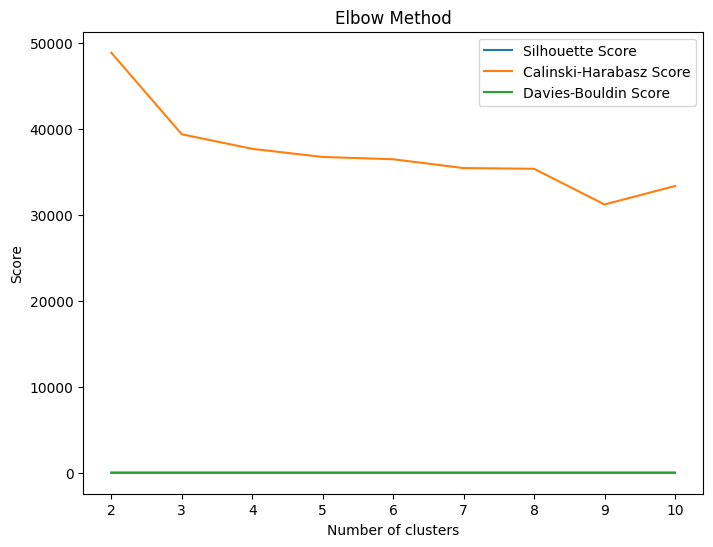

In [50]:
# Elbow method to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, label='Silhouette Score')
plt.plot(range(2, 11), ch_scores, label='Calinski-Harabasz Score')
plt.plot(range(2, 11), db_scores, label='Davies-Bouldin Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.legend()
plt.show()

In [51]:
# Select the optimal number of clusters based on the Elbow method
optimal_clusters = sil_scores.index(max(sil_scores)) + 2
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 2


In [52]:
# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(X_pca)

C:\Users\Pratiksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [53]:
df2['cluster'] = labels

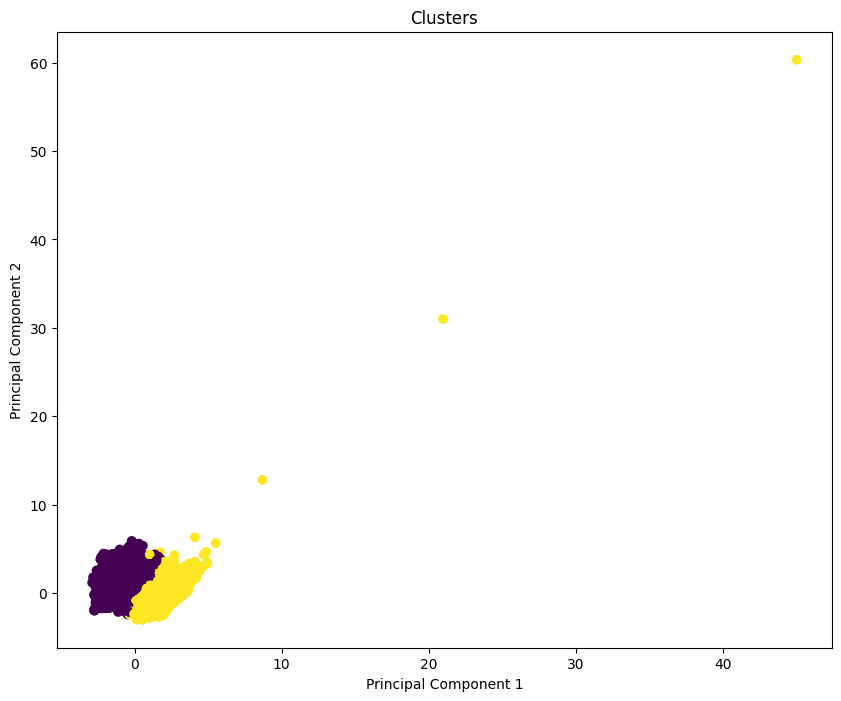

In [54]:
# Cluster Analysis
# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df2['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.show()

In [55]:
# Describe the characteristics of each cluster
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}:")
    print(df2[df2['cluster'] == cluster].describe())
    print()

Cluster 0:
              price       category       location     geo_region  \
count  1.164400e+05  116440.000000  116440.000000  116440.000000   
mean   1.868248e+06       4.864256     103.808142       5.865785   
std    3.483990e+06       2.234576      55.881173       6.482168   
min    2.000000e+00       0.000000       0.000000       0.000000   
25%    2.280000e+05       3.000000      61.000000       1.000000   
50%    5.500000e+05       6.000000     104.000000       2.000000   
75%    2.200000e+06       6.000000     153.000000      12.000000   
max    1.100000e+08       9.000000     203.000000      20.000000   

                area      is_member    is_verified  membership_level  \
count  116440.000000  116440.000000  116440.000000     116440.000000   
mean        8.603246       0.000670       0.004105          0.002645   
std         5.940243       0.025873       0.063940          0.063478   
min         0.000000       0.000000       0.000000          0.000000   
25%         4.00

# Section 3: Geographical Analysis of Demand and Supply

## Problem Statement: Analyze the geographical distribution of vehicle advertisements to understand demand and supply patterns.

# Data Cleaning & Preprocessing:
    Handle missing values appropriately.
    Encode categorical variables.
    Normalize/standardize numerical features if necessary.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

In [112]:
dff = pd.read_csv("vehicles.csv") #load file
dff.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [113]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [114]:
dff.columns

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [115]:
dff.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [116]:
dff.dropna(subset=['ad_description','timestamp','posted_date','deactivation_date'],inplace=True)

In [117]:
dff=dff.drop('details',axis=1)
dff=dff.drop('member_since',axis=1)

In [118]:
dff.isnull().sum()

ad_title                   0
ad_description             0
slug                       0
title                      0
type                       0
price                   3811
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member               9049
is_authorized_dealer    9049
is_featured_member      9049
is_verified                0
membership_level           0
properties                 0
user                       0
dtype: int64

In [119]:
dff['price'] = pd.to_numeric(dff['price'].str.replace('Rs', '').str.replace(',', ''), errors='coerce')

In [120]:
dff['price'].fillna(dff['price'].median(), inplace=True)

In [121]:
dff.isnull().sum()

ad_title                   0
ad_description             0
slug                       0
title                      0
type                       0
price                      0
timestamp                  0
posted_date                0
deactivation_date          0
category                   0
parent_category            0
location                   0
geo_region                 0
area                       0
is_delivery_free           0
is_doorstep_delivery       0
is_dsd_applicable          0
is_member               9049
is_authorized_dealer    9049
is_featured_member      9049
is_verified                0
membership_level           0
properties                 0
user                       0
dtype: int64

In [122]:
# categorical_features = ['type', 'category','is_verified','location', 'geo_region', 'membership_level', 'is_member', 'is_authorized_dealer', 'is_featured_member']
# label_encoders = {col: LabelEncoder() for col in categorical_features}

In [104]:
# for col in categorical_features:
#     dff[col] = label_encoders[col].fit_transform(dff[col])

In [105]:
dff.isnull().sum()

ad_title                0
ad_description          0
slug                    0
title                   0
type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

In [106]:
# Convert categorical geographical variables to numerical using one-hot encoding
# label =LabelEncoder()
# for column in ['location','geo_region','area']:
#     dff[column]= label.fit_transform(dff[column])


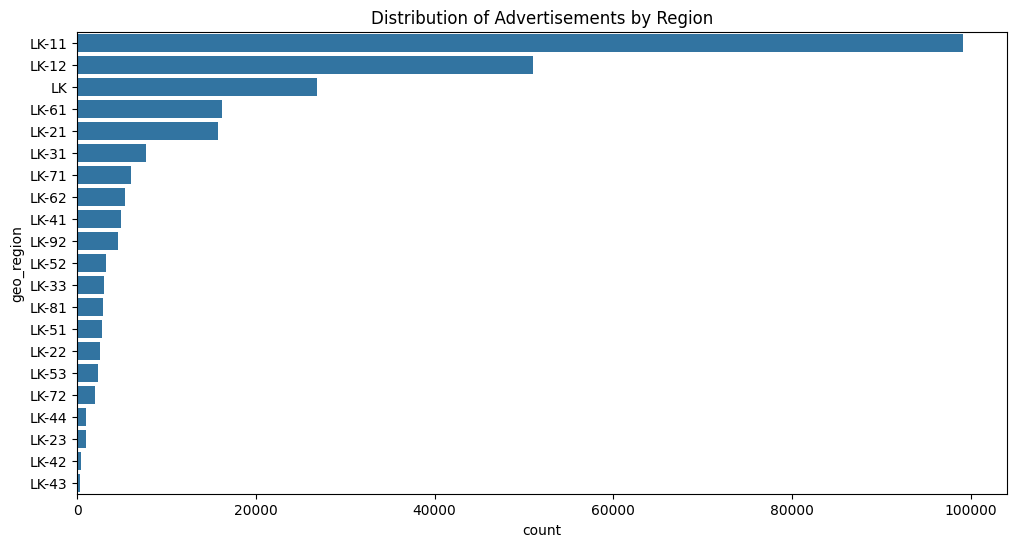

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of advertisements by region
plt.figure(figsize=(12, 6))
sns.countplot(y='geo_region', data=dff, order=dff['geo_region'].value_counts().index)
plt.title('Distribution of Advertisements by Region')
plt.show()


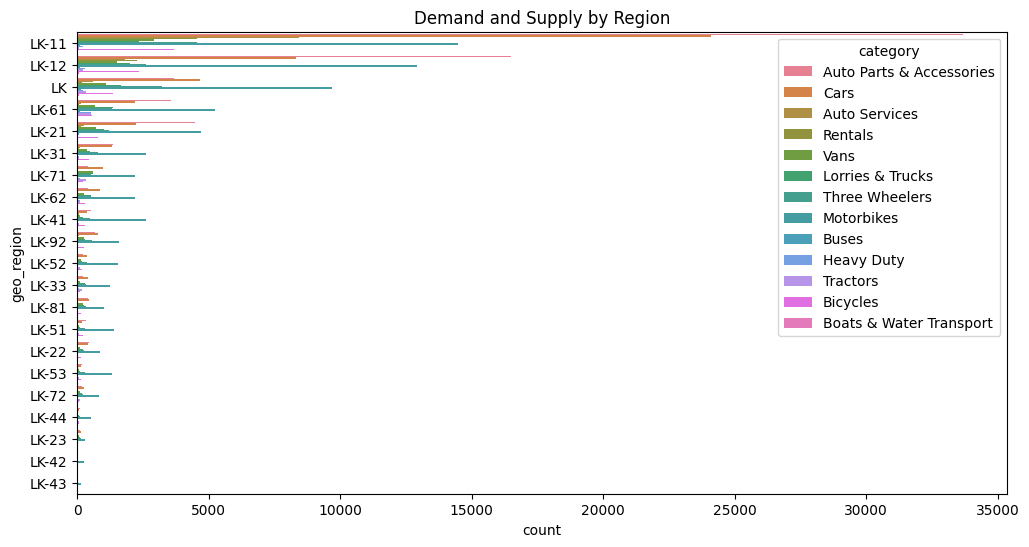

In [124]:
# Assuming 'category' or 'parent_category' indicates demand and supply
plt.figure(figsize=(12, 6))
sns.countplot(y='geo_region', hue='category', data=dff, order=dff['geo_region'].value_counts().index)
plt.title('Demand and Supply by Region')
plt.show()


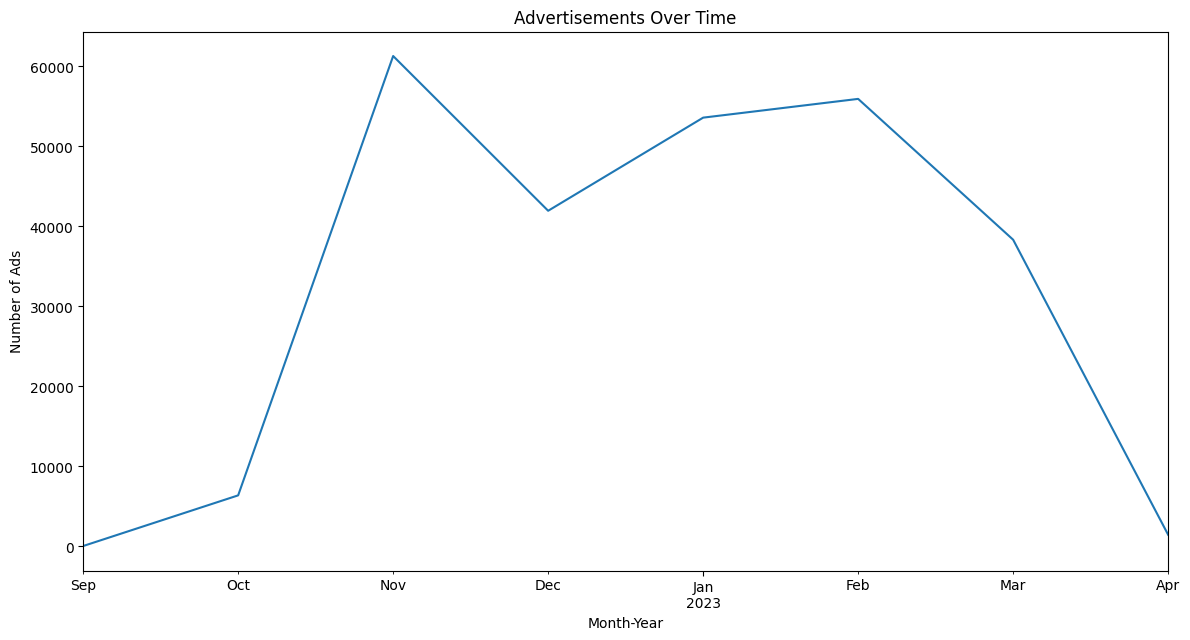

In [125]:
dff['posted_date'] = pd.to_datetime(dff['posted_date'])
dff['month_year'] = dff['posted_date'].dt.to_period('M')

# Plotting advertisements over time
plt.figure(figsize=(14, 7))
dff.groupby('month_year').size().plot()
plt.title('Advertisements Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Ads')
plt.show()


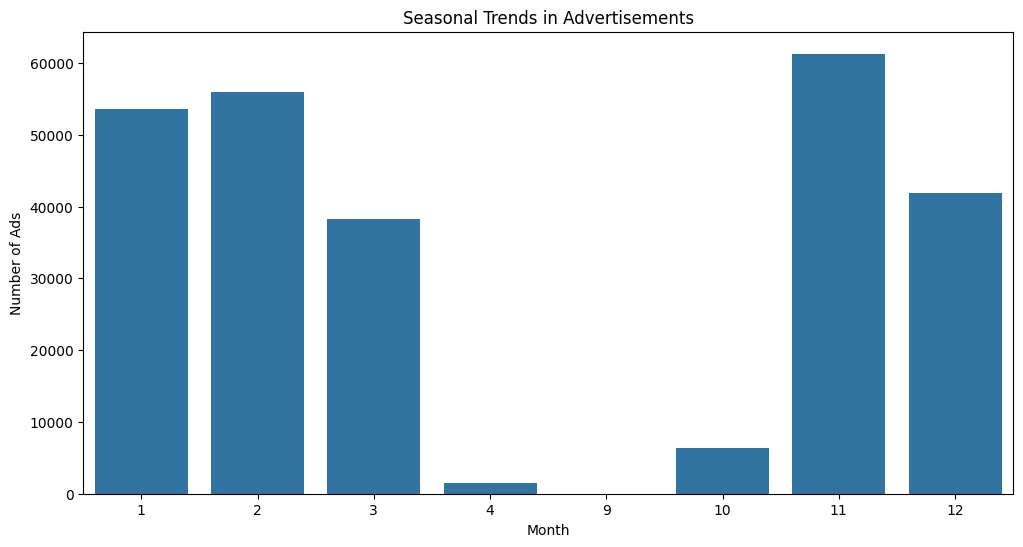

In [126]:
dff['month'] = dff['posted_date'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=dff)
plt.title('Seasonal Trends in Advertisements')
plt.xlabel('Month')
plt.ylabel('Number of Ads')
plt.show()
